In [80]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

cmi = {}
mean_corr = {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}

periodic = False
model = "1DES"
if model == "1DXXZ":
    int_ = "delta"
    param = [1.2, 1.05, 1.01, 1.0, 0.99, 0.8, -0.8, -0.99, -1.0, -1.01, -1.05, -1.2]
elif model == "1DJ1J2":
    int_ = "J2"
    param = [0.2, 0.4, 0.48, 0.52, 0.6, 0.7, 0.9, 1.0, 1.05, 1.15]
elif model == "1DTFIM":
    int_ = "B"
    param =  [-0.5, -0.8, -0.95,-0.98, -1.0, -1.02, -1.05, -1.2, -1.5, -2.0, -3.5, -6.0]
elif model == "1DES":
    int_ = "angle"
    param = [0.0, 0.05*np.pi, 0.1*np.pi, 0.15*np.pi, 0.2*np.pi, 0.25*np.pi, 0.3*np.pi, 0.35*np.pi, 0.4*np.pi, 0.45*np.pi, 0.5*np.pi]
elif model == "1Dcluster":
    int_ = "angle"
    param = [0.0, 0.05*np.pi, 0.1*np.pi, 0.15*np.pi, 0.2*np.pi, 0.25*np.pi, 0.3*np.pi, 0.35*np.pi, 0.4*np.pi, 0.45*np.pi, 0.5*np.pi]
L = 18
# Looping through the values and loading each file

for b in param:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    cmi[b] = np.load(filename)
    cmi[b] = np.abs(cmi[b])+1e-16
    if periodic == True:
        cmi[b] = np.flip(cmi[b])
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    mean_corr[b] = np.load(filename)

    if periodic == False:
        filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
        var_corr[b] = np.load(filename)
        var_corr[b] = var_corr[b]
    mean_corr[b] = mean_corr[b]
    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    gap[b] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    cmi_traceout[b] = np.load(filename, allow_pickle=True)
    for j in range(len(cmi_traceout[b])):
        cmi_traceout[b][j] = np.array(cmi_traceout[b][j])[np.array(cmi_traceout[b][j])>1e-13]
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    mag[b] = np.load(filename)



In [81]:

cmi_length = []
err_cmi_length = []
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range(len(param))]
err_cmi_length_traceout = [[] for i in range(len(param))]

for i in param:
    if len(cmi[i])>=3:
        df = len(cmi[i]) - 2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x) ** 2))
        cmi_length.append(1/cmi_len)
        err_cmi_length.append(1/cmi_len**2*err)
    if len(mean_corr[i])>=3:
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(mean_corr[i]), 1,
                                                        full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x) ** 2))
        corre_length.append(1/corr_len)
        err_corre_length.append(1/corr_len**2*err)

    for j in range(len(cmi_traceout[i])):
        if len(cmi_traceout[i][j])>=3:
            df = len(cmi_traceout[i][j]) - 2
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])),
                                                           -np.log(cmi_traceout[i][j] + 1e-32), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x) ** 2))
            cmi_length_traceout[param.index(i)].append(1/cmi_len)
            err_cmi_length_traceout[param.index(i)].append(1/cmi_len**2*err)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\2652270112.py:17: RuntimeWarning: divide by zero encountered in log
  (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(mean_corr[i]), 1,


In [82]:
cmi_length

[np.float64(-1.7846160275296252e+16),
 np.float64(90.47437791591425),
 np.float64(16.3259862449574),
 np.float64(6.1129920098384956),
 np.float64(3.354726325510777),
 np.float64(2.098133012612858),
 np.float64(1.3768569137643936),
 np.float64(0.9141598579206205),
 np.float64(0.4728992013866912),
 np.float64(0.4681875540394194),
 np.float64(33.52077757186675)]

In [83]:
for i in param:
    print(np.log(cmi[i]))

[-0.36651292 -0.36651292 -0.36651292 -0.36651292 -0.36651292 -0.36651292
 -0.36651292 -0.36651292 -0.36651292 -0.36651292 -0.36651292 -0.36651292
 -0.36651292 -0.36651292 -0.36651292 -0.36651292 -0.36651292]
[-0.66552649 -0.68911841 -0.68971474 -0.71270919 -0.7133028  -0.73571452
 -0.73631684 -0.75815884 -0.75877877 -0.78006287 -0.7807074  -0.80144466
 -0.80211923 -0.82232014 -0.82302894 -0.84270359 -0.84344981]
[-1.03263795 -1.16399667 -1.17858919 -1.30254876 -1.31705222 -1.43401243
 -1.44927994 -1.5594528  -1.57570038 -1.67926138 -1.69658955 -1.79370295
 -1.81205802 -1.90288683 -1.92216042 -2.00687138 -2.02689671]
[-1.11961292 -1.4179869  -1.50602815 -1.77954657 -1.86505426 -2.1167095
 -2.21045909 -2.44309159 -2.54402952 -2.76049375 -2.86837138 -3.07056131
 -3.1835496  -3.37330743 -3.4902968  -3.66858075 -3.78783258]
[-1.12060575 -1.5686913  -1.85943614 -2.23740757 -2.50148117 -2.84376371
 -3.12145196 -3.43676616 -3.71495077 -4.01848319 -4.29749912 -4.59077729
 -4.86821581 -5.1549173

In [84]:
print(gap)

{0.0: array(2.), 0.15707963267948966: array(2.), 0.3141592653589793: array(2.), 0.47123889803846897: array(2.), 0.6283185307179586: array(2.), 0.7853981633974483: array(2.), 0.9424777960769379: array(2.), 1.0995574287564276: array(2.), 1.2566370614359172: array(2.), 1.413716694115407: array(2.), 1.5707963267948966: array(2.)}


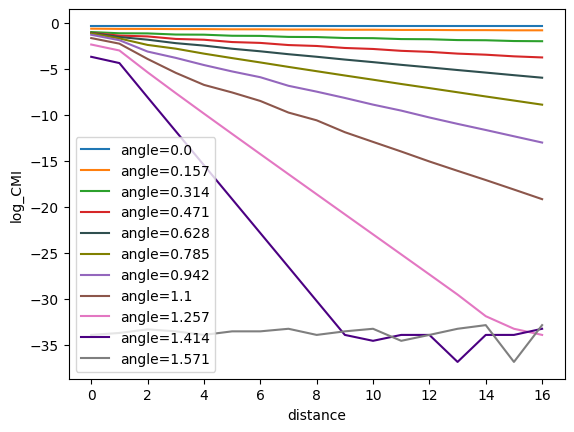

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(mean_corr[i]) - 1) + 1, np.log(mean_corr[i][1:]), label= int_ + "=" + str(round(i, 3)))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:16: RuntimeWarning: divide by zero encountered in log
  np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:16: RuntimeWarning: divide by zero encountered in divide
  np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:16: RuntimeWarning: invalid value encountered in multiply
  np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:17: RuntimeWarning: divide by zero encountered in log
  np.log(mean_co

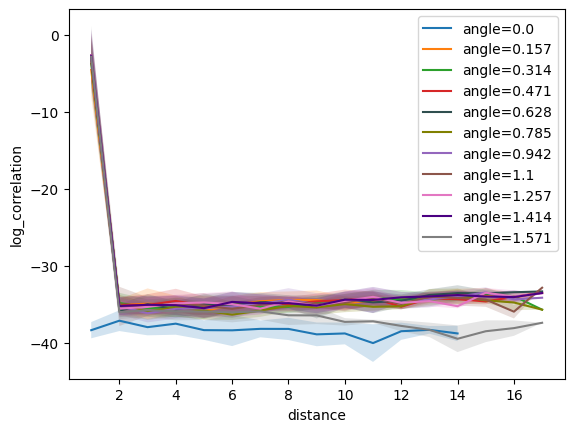

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


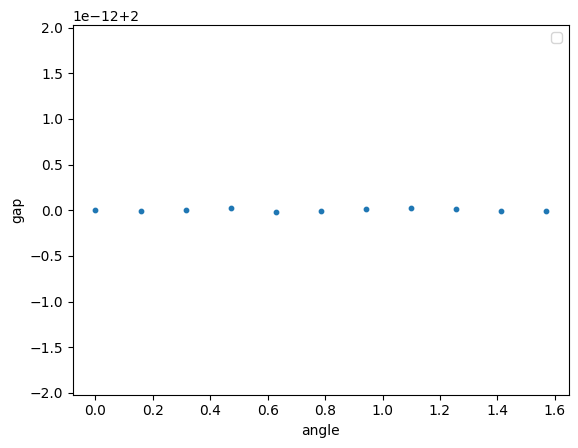

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:37: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(mean_corr[i][1:length+1]), np.log(cmi[i][:length]), label= int_ + "=" + str(round(i, 3)))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:40: RuntimeWarning: divide by zero encountered in log
  np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:40: RuntimeWarning: divide by zero encountered in divide
  np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:40: RuntimeWarning: invalid value encountered in multiply
  np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:41:

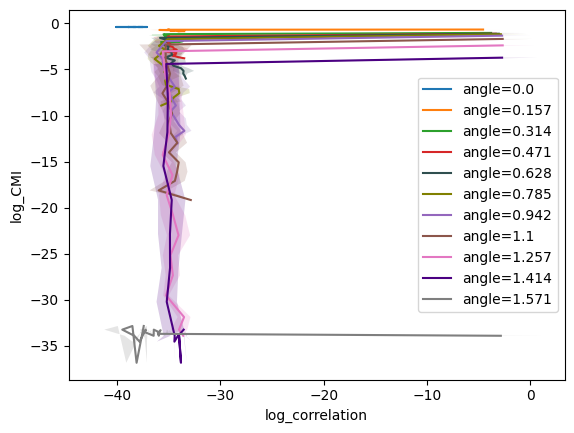

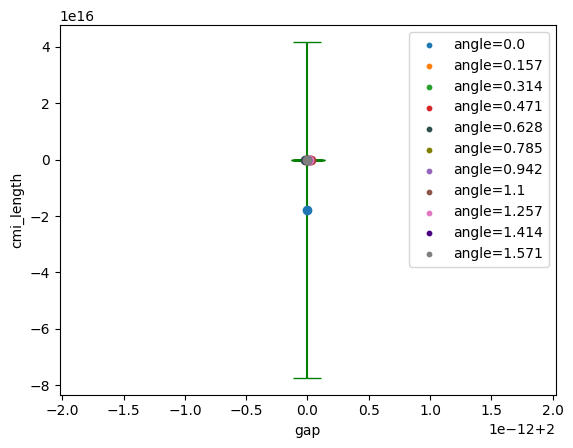

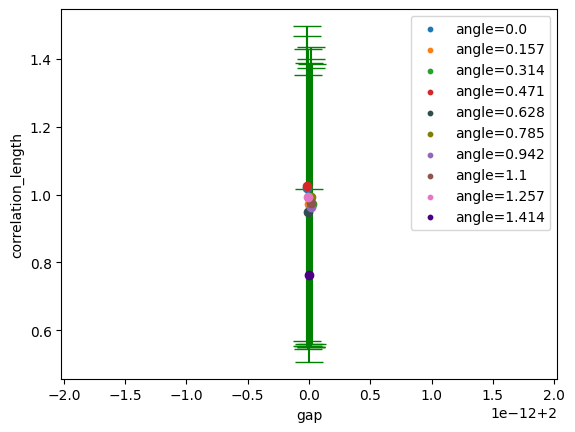

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29136\3425881499.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


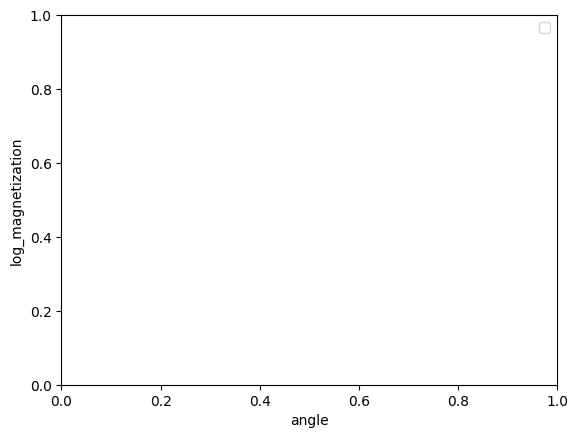

In [85]:

for i in param:
    if len(cmi[i])>=3: #so that meaningful error can be got
        plt.plot(np.log(cmi[i]), label= int_ +"=" + str(round(i, 3)))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L" + str(L) + "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    if len(mean_corr[i])>=3: #so that meaningful error can be got
        plt.plot(np.arange(len(mean_corr[i]) - 1) + 1, np.log(mean_corr[i][1:]), label= int_ + "=" + str(round(i, 3)))
        if periodic == False:
            plt.fill_between(np.arange(len(mean_corr[i]) - 1) + 1,
                             np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
                             np.log(mean_corr[i][1:]) + 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig("figure/"+model+"/correlation_"+model+"_L" + str(L) + "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()


B_ = [param[i] for i in range(len(param))]
plt.scatter(B_, gap.values(), s=10)
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    length = min(len(cmi[i]), len(mean_corr[i]))
    plt.plot(np.log(mean_corr[i][1:length+1]), np.log(cmi[i][:length]), label= int_ + "=" + str(round(i, 3)))
    if periodic == False:
        plt.fill_betweenx(np.log(cmi[i][:length]),
                          np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
                          np.log(mean_corr[i][1:length+1]) + 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig(
    "figure/"+model+"/correlation_cmi_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in param:
    if len(cmi[i])>=3:
        gap_list.append(gap[i])
for i,j in zip(param, range(len(gap_list))):
    plt.scatter(gap_list[j], cmi_length[j], label= int_ +"=" + str(round(i, 3)), s=10)
    plt.errorbar(gap_list[j], cmi_length[j], yerr=err_cmi_length[j][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig(
    "figure/"+model+"/cmi_length_gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in param:
    if len(mean_corr[i])>=3 and corre_length[param.index(i)]>0:
        gap_list.append(gap[i])
for i,j in zip(param, range(len(gap_list))):
    plt.scatter(gap_list[j], np.array(corre_length)[np.array(corre_length)>0][j], label= int_ +"=" + str(round(i, 3)), s=10)
    plt.errorbar(gap_list[j], np.array(corre_length)[np.array(corre_length)>0][j], yerr=np.array(err_corre_length)[np.array(corre_length)>0, 0][j], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L" + str(L) +  "_"+ "periodic_" + str(
    periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    mag[i] = np.abs(mag[i])
    if mag[i]>1e-13:
        plt.scatter(i, np.log(mag[i]), label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("log_magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

In [41]:
corre_length

[np.float64(nan),
 np.float64(0.9870689038202315),
 np.float64(1.0282093746240164),
 np.float64(0.9793311281061998),
 np.float64(0.9885556692997453),
 np.float64(0.9436635080235609),
 np.float64(1.013469473561604),
 np.float64(0.9733095605152969),
 np.float64(1.0234915802290019),
 np.float64(0.9534421789873785),
 np.float64(nan)]

0
[]
1
[np.float64(0.29084960805552484), np.float64(0.29572010447525066), np.float64(0.2957223231169702), np.float64(0.29572461982324766), np.float64(0.295724539606321), np.float64(0.29572232221666395), np.float64(0.2957224027321974), np.float64(0.2957245003980432), np.float64(0.29571998626507806), np.float64(0.29572458002517255), np.float64(0.3034814274128155), np.float64(0.3159295804495749), np.float64(0.3381620636305371)]


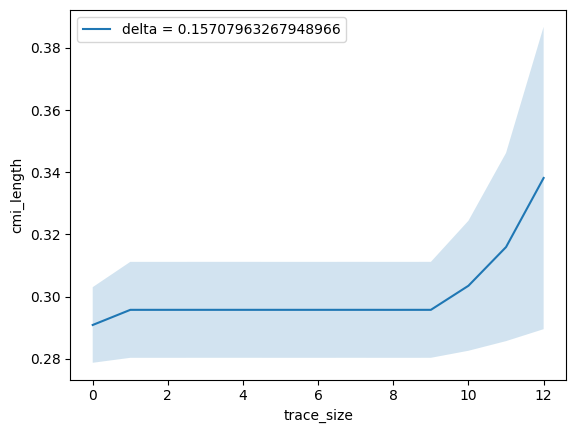

2
[np.float64(0.4632850104448716), np.float64(0.46709936167067806), np.float64(0.4669335462617983), np.float64(0.46709973099318286), np.float64(0.46834225665972956), np.float64(0.4700472080576911), np.float64(0.4722900250672477), np.float64(0.4753617541310836), np.float64(0.4797094045532904), np.float64(0.48612365420990905), np.float64(0.49610542354918363), np.float64(0.5128041530454225), np.float64(0.5438771782644608)]


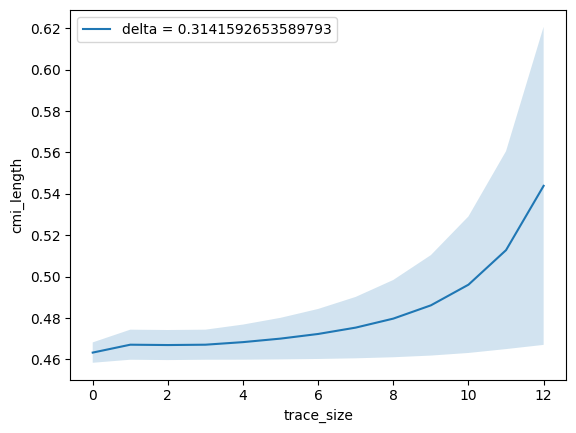

3
[np.float64(0.9134911492006285), np.float64(0.9103449250505931), np.float64(0.9046532228401315), np.float64(0.8989854123974528), np.float64(0.8937549881941239), np.float64(0.8892668381784209), np.float64(0.883291303269915), np.float64(0.8765152227399847), np.float64(0.8710743571942346), np.float64(0.8426921431808557), np.float64(0.8350660186630996), np.float64(0.8069231416125764), np.float64(0.7722437503156023)]


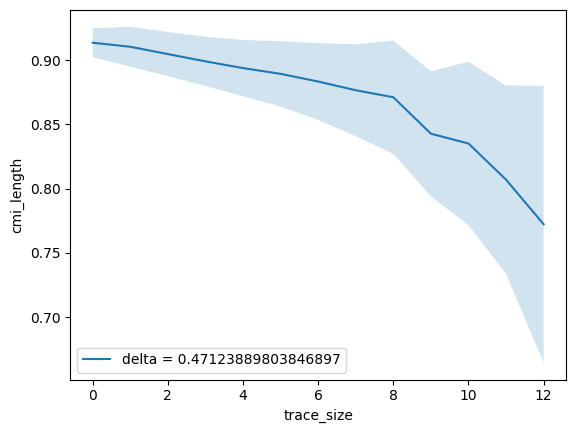

4
[np.float64(1.3768048147507157), np.float64(1.3641842147091663), np.float64(1.3563186545551766), np.float64(1.3480312925926135), np.float64(1.3398988261389941), np.float64(1.3339721687631514), np.float64(1.3145711844864278), np.float64(1.302545823818176), np.float64(1.2993527384869665), np.float64(1.268541875188794), np.float64(1.297977752947928), np.float64(1.235286310158246), np.float64(1.17574430855596)]


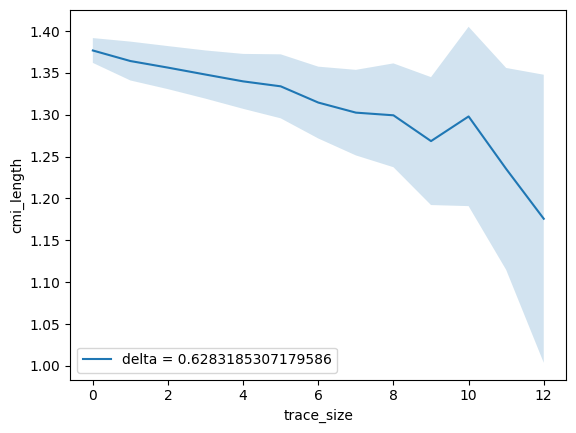

5
[np.float64(2.0981330126105995), np.float64(2.059898828345935), np.float64(2.043720756295886), np.float64(2.0329304510853627), np.float64(2.0187679738343474), np.float64(1.9949341329014152), np.float64(1.9870066372827009), np.float64(1.964844075747336), np.float64(1.9400042422065464), np.float64(1.9265779396175626), np.float64(1.8984935986850877), np.float64(1.8823833455533008), np.float64(1.8244986170381141)]


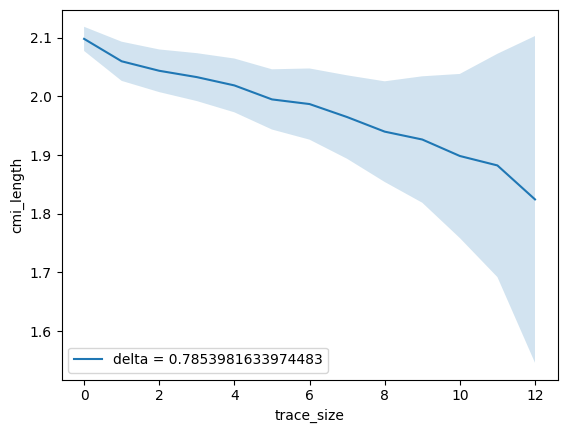

6
[np.float64(3.352807180245484), np.float64(3.2338236316811635), np.float64(3.228893607753047), np.float64(3.1799758330939376), np.float64(3.1869798205378936), np.float64(3.1129071342218007), np.float64(3.145615436258104), np.float64(3.0296495583650387), np.float64(3.1124986692445584), np.float64(2.916799717030364), np.float64(3.095057468010004), np.float64(2.7697890138430674), np.float64(3.1269284583979378)]


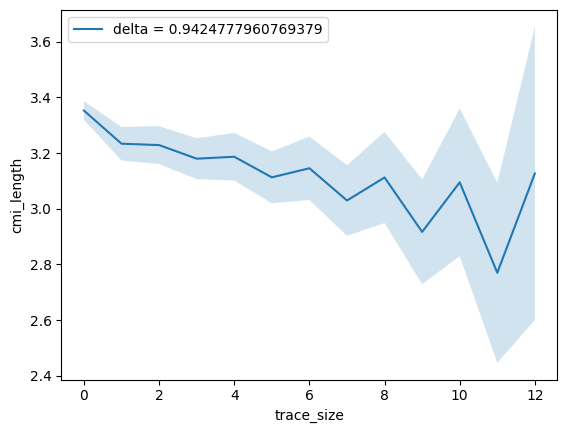

7
[np.float64(5.767740626542075), np.float64(5.221397672322043), np.float64(6.000580195015429), np.float64(5.001697220237869), np.float64(6.0519527079328626), np.float64(4.728318699561764), np.float64(6.137358882397271), np.float64(4.394344548383108), np.float64(6.26859249845265), np.float64(3.9827927931932186), np.float64(6.466159611039275), np.float64(3.5172749403865735), np.float64(6.733079276816587)]


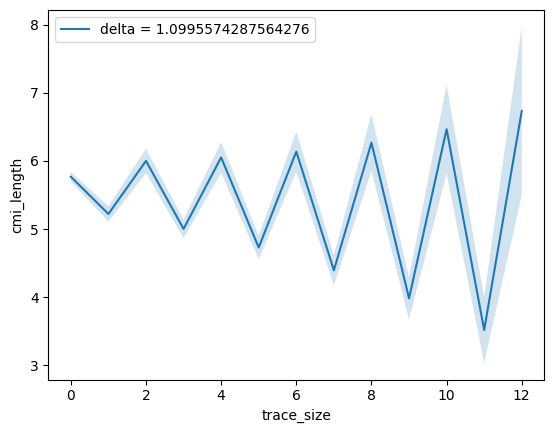

8
[np.float64(9.455322809671147), np.float64(7.437752402385077), np.float64(16.098335609241413), np.float64(6.802094305893572), np.float64(16.40782938231287), np.float64(6.122449245049789), np.float64(16.742763346926537), np.float64(5.406994344511603), np.float64(17.09757247613326), np.float64(4.670231174852366), np.float64(17.46665113246355), np.float64(3.961997962934605), np.float64(17.84789486453813)]


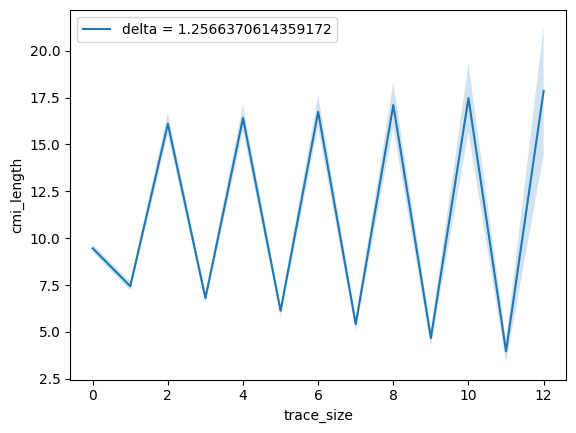

9
[np.float64(11.06818072529967), np.float64(8.069929777272957), np.float64(77.19755603985787), np.float64(7.2079320153445), np.float64(77.51998041637971), np.float64(6.360595844684271), np.float64(77.81923017958597), np.float64(5.5358900943365565), np.float64(78.09540457454061), np.float64(4.748690290125941), np.float64(78.35586785976146), np.float64(4.038315412830547), np.float64(78.6330186489677)]


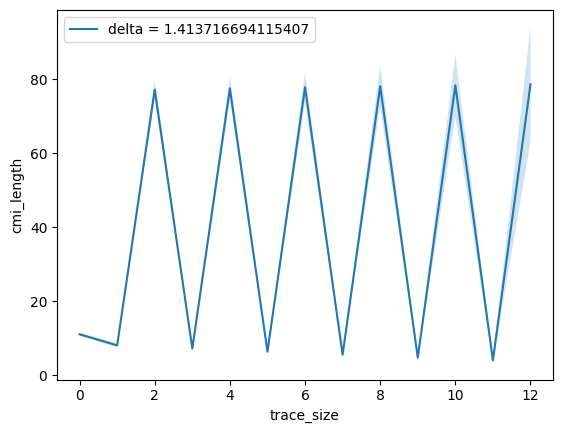

10
[]


<Figure size 640x480 with 0 Axes>

In [42]:
for i in range(len(param)):
    print(i)
    print(cmi_length_traceout[i])
    if len(cmi_length_traceout[i])>=3:
        cmi_length_traceout[i] = np.array(cmi_length_traceout[i])
        err_cmi_length_traceout[i] = np.array(err_cmi_length_traceout[i]).ravel()
        plt.plot(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(param[i]))
        plt.fill_between(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i] - err_cmi_length_traceout[i],
                         cmi_length_traceout[i] + err_cmi_length_traceout[i], alpha=0.2)
        plt.xlabel("trace_size")
        plt.ylabel("cmi_length")
        plt.legend()
        plt.savefig(
            "figure/"+model+"/traceout/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(param[i]) + "periodic_" + str(
                periodic) + ".png")
        plt.show()
        plt.clf()

In [158]:
np.concatenate((np.array([[1,2,3]]), np.array([[2,1,3]])), axis = 0)

array([[1, 2, 3],
       [2, 1, 3]])